# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

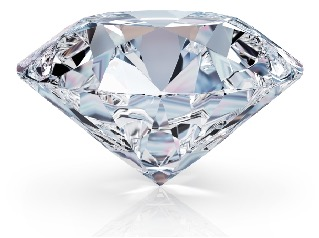

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [36]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
DIAMONDS_DATASET = "C:/Users/muras/Downloads/diamonds_good.csv"

In [38]:
df = pl.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [39]:
df.head(10)

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326.0,3.95,3.98,2.43
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326.0,3.89,3.84,2.31
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327.0,4.05,4.07,2.31
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334.0,4.2,4.23,2.63
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335.0,4.34,4.35,2.75
null,"""Very Good""","""J""","""VVS2""",62.8,57.0,336.0,3.94,3.96,2.48
0.24,"""Very Good""","""I""","""VVS1""",62.3,57.0,336.0,3.95,3.98,2.47
0.26,"""Very Good""","""H""","""SI1""",61.9,55.0,337.0,4.07,4.11,2.53
0.22,"""Fair""","""E""","""VS2""",65.1,61.0,337.0,3.87,3.78,2.49


In [40]:
df.tail()

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.72,"""Ideal""","""D""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""D""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""D""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56
0.86,"""Premium""","""H""","""SI2""",61.0,58.0,2757.0,6.15,6.12,3.74
0.75,"""Ideal""","""D""","""SI2""",62.2,55.0,2757.0,5.83,5.87,3.64


In [41]:
df.sample(3)

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.33,"""Ideal""","""D""","""VS2""",62.3,54.0,667.0,4.43,4.46,2.77
0.33,"""Premium""","""D""","""SI1""",60.4,60.0,608.0,4.41,4.46,2.68
1.11,"""Very Good""","""E""","""SI2""",62.0,58.0,4769.0,6.61,6.68,4.12


## Исследование данных

Размер датасета

In [42]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [46]:
df.schema

Schema([('carat', Float64),
        ('cut', String),
        ('color', String),
        ('clarity', String),
        ('depth', Float64),
        ('table', Float64),
        ('price', Float64),
        ("'x'", Float64),
        ("'y'", Float64),
        ("'z'", Float64)])

Основные числовые характеристики

In [47]:
df.describe()

statistic,carat,cut,color,clarity,depth,table,price,'x','y','z'
str,f64,str,str,str,f64,f64,f64,f64,f64,f64
"""count""",53442.0,"""53940""","""53940""","""53940""",52950.0,53940.0,53940.0,53940.0,53935.0,53940.0
"""null_count""",498.0,"""0""","""0""","""0""",990.0,0.0,0.0,0.0,5.0,0.0
"""mean""",0.797561,null,null,null,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
"""std""",0.473534,null,null,null,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
"""min""",0.2,"""Fair""","""D""","""I1""",43.0,43.0,326.0,0.0,0.0,0.0
"""25%""",0.4,null,null,null,61.0,56.0,950.0,4.71,4.72,2.91
"""50%""",0.7,null,null,null,61.8,57.0,2401.0,5.7,5.71,3.53
"""75%""",1.04,null,null,null,62.5,59.0,5324.0,6.54,6.54,4.04
"""max""",5.01,"""Very Good""","""J""","""VVS2""",79.0,95.0,18823.0,10.74,58.9,31.8


In [49]:
df.height - df.unique().height

135

In [51]:
# дубликаты
df.filter(df.is_duplicated())

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
…,…,…,…,…,…,…,…,…,…
0.71,"""Good""","""F""","""SI2""",64.1,60.0,2130.0,0.0,0.0,0.0
0.51,"""Ideal""","""F""","""VVS2""",61.2,56.0,2203.0,5.19,5.17,3.17
0.51,"""Ideal""","""F""","""VVS2""",61.2,56.0,2203.0,5.19,5.17,3.17


In [53]:
# размерность данных без дубликатов
df = df.unique()
df.shape

(53805, 10)

## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [57]:
df['carat'].hist(bin_count=50)

breakpoint,category,count
f64,cat,u32
0.2962,"""[0.2, 0.2962]""",1582
0.3924,"""(0.2962, 0.3924]""",11357
0.4886,"""(0.3924, 0.4886]""",4490
0.5848,"""(0.4886, 0.5848]""",6230
0.681,"""(0.5848, 0.681]""",1198
…,…,…
4.6252,"""(4.529, 4.6252]""",0
4.7214,"""(4.6252, 4.7214]""",0
4.8176,"""(4.7214, 4.8176]""",0


In [58]:
median_carat = df.select(pl.col('carat').median()).item()
df = df.with_columns(
    pl.col('carat').fill_null(median_carat)
)

In [59]:
median_depth = df.select(pl.col('depth').median()).item()
df = df.with_columns(
    pl.col('depth').fill_null(median_depth)
)

### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [60]:
df = df.rename({c: c.replace("'", "") for c in df.columns})
median_carat = df['carat'].median()
median_depth = df['depth'].median()
median_y = df['y'].median()
df = df.with_columns([
    pl.col('carat').fill_null(median_carat),
    pl.col('depth').fill_null(median_depth),
    pl.col('y').fill_null(median_y)
])
median_y

5.71

## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

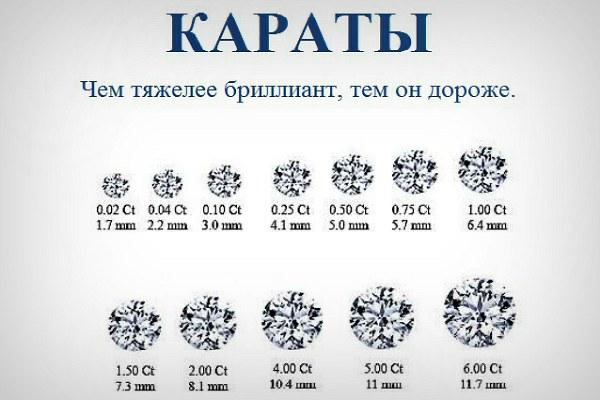

In [ ]:
plt.figure(figsize=(4,3))

plt.hist(df.carat);

In [ ]:
plt.figure(figsize=(4,3))

plt.hist(df.carat, bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [61]:
min_max = df.select([
    pl.col('carat').min().alias('min_carat'),
    pl.col('carat').max().alias('max_carat')
])
min_max

min_carat,max_carat
f64,f64
0.2,5.01


Сколько мелких бриллиантов в датасете?

In [62]:
df.filter(pl.col('carat') < 0.3).shape[0]

1582

Сколько процентов бриллиантов среди всего датасета - крупные?

In [64]:
100 * df.filter(pl.col('carat') >= 1).height / df.height

35.00046464083264

Посмотрим как число карат влияет на стоимость алмаза

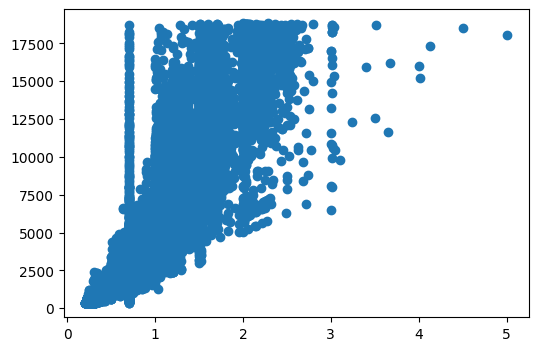

In [66]:
plt.figure(figsize=(6,4))

plt.scatter(df['carat'], df['price']);

In [ ]:
np.corrcoef(df.carat, df.price)[0][1]

### Cut (огранка алмаза)

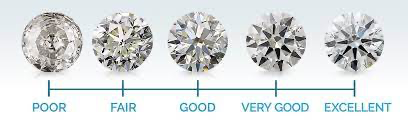

In [67]:
df['cut'].value_counts(normalize=True)

cut,proportion
str,f64
"""Very Good""",0.224013
"""Premium""",0.255088
"""Ideal""",0.398941
"""Good""",0.090772
"""Fair""",0.0297
"""Goood""",0.001487


In [70]:
df = df.with_columns(pl.col('cut').replace('Goood', 'Good'))

Посмотрим как влияет огранка алмаза на его стоимость

C:\Users\muras\AppData\Local\Temp\ipykernel_7456\1625806102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cut', y='price', data = df, palette='summer')


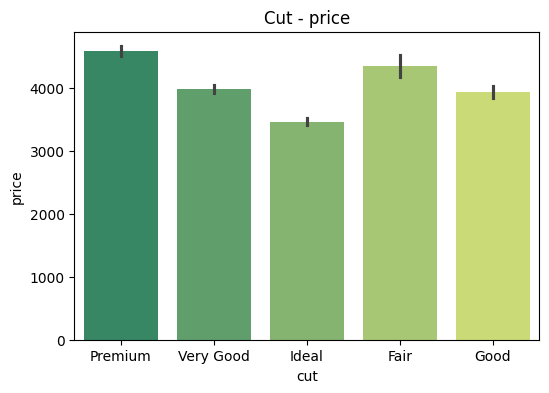

In [71]:
plt.figure(figsize=(6,4))

sns.barplot(x='cut', y='price', data = df, palette='summer')
plt.title('Cut - price')
plt.show();

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [72]:
max_carat_fair = df.filter(pl.col('cut') == 'Fair')['carat'].max()
round(max_carat_fair, 2)

5.01

Посчитаем среднюю стоимость алмазов в каждой категории

In [74]:
df.group_by('cut').agg(pl.col('price').mean())

cut,price
str,f64
"""Ideal""",3462.59385
"""Fair""",4347.735294
"""Very Good""",3982.162781
"""Premium""",4581.864918
"""Good""",3926.266317


Посчитаем несколько характеристик в зависимости от огранки

In [75]:
df.group_by('cut').agg([
    pl.col('price').mean().alias('PriceMean'),
    pl.col('price').median().alias('PriceMedian'),
    pl.col('carat').mean().alias('CaratMean')
])

cut,PriceMean,PriceMedian,CaratMean
str,f64,f64,f64
"""Good""",3926.266317,3029.5,0.845796
"""Very Good""",3982.162781,2649.0,0.804177
"""Fair""",4347.735294,3282.0,1.040094
"""Ideal""",3462.59385,1813.0,0.703331
"""Premium""",4581.864918,3175.0,0.889616


In [76]:
df.group_by('cut').agg([
    pl.col('price').mean().alias('PriceMean'),
    pl.col('price').median().alias('PriceMedian'),
    pl.col('carat').mean().alias('CaratMean')
]).sort('PriceMean', descending=True)

cut,PriceMean,PriceMedian,CaratMean
str,f64,f64,f64
"""Premium""",4581.864918,3175.0,0.889616
"""Fair""",4347.735294,3282.0,1.040094
"""Very Good""",3982.162781,2649.0,0.804177
"""Good""",3926.266317,3029.5,0.845796
"""Ideal""",3462.59385,1813.0,0.703331


## Table and Depth

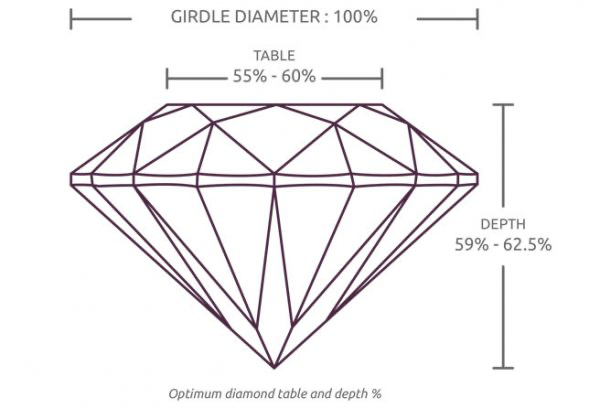

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [77]:
df.filter((pl.col('table')>=55) & (pl.col('table')<=60)).height / df.height

0.8439364371340954

### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [80]:
optimal_df = df.filter(
    (pl.col('depth') >= 59) & (pl.col('depth') <= 62.5) &
    (pl.col('table') >= 55) & (pl.col('table') <= 60)
)
share_optimal = optimal_df.height / df.height
round(share_optimal, 2)

0.62

### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [81]:
median_price_all = df.select(pl.col('price').median())[0, 0]
optimal_df = df.filter(
    (pl.col('depth') >= 59) & (pl.col('depth') <= 62.5) &
    (pl.col('table') >= 55) & (pl.col('table') <= 60)
)
median_price_optimal = optimal_df.select(pl.col('price').median())[0, 0]
median_price_all, median_price_optimal

(2401.0, 2215.0)

Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [83]:
np.corrcoef(df['table'], df['price'])[0][1]

0.12662153885758187

In [84]:
np.corrcoef(df['depth'], df['price'])[0][1]

-0.010831614226837219

## Clarity - прозрачность алмаза

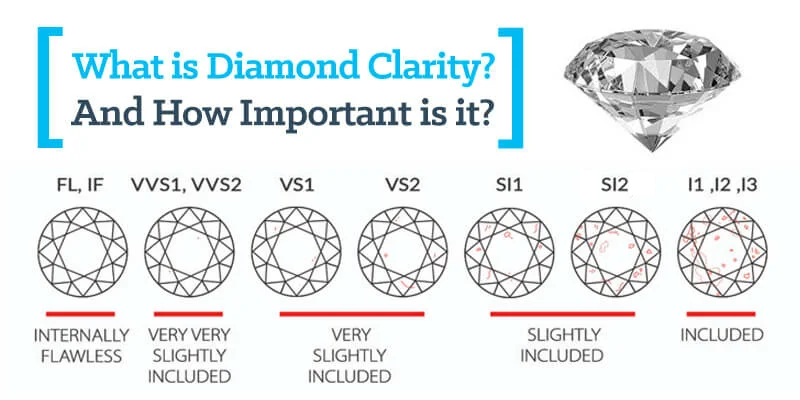

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [85]:
df['clarity'].unique()

clarity
str
"""SI1"""
"""VVS2"""
"""VS1"""
"""VS2"""
"""SI2"""
"""VVS1"""
"""IF"""
"""I1"""


### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [86]:
vvs_count = df.filter(pl.col('clarity').is_in(['VVS1', 'VVS2'])).height
vvs_count

8704

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

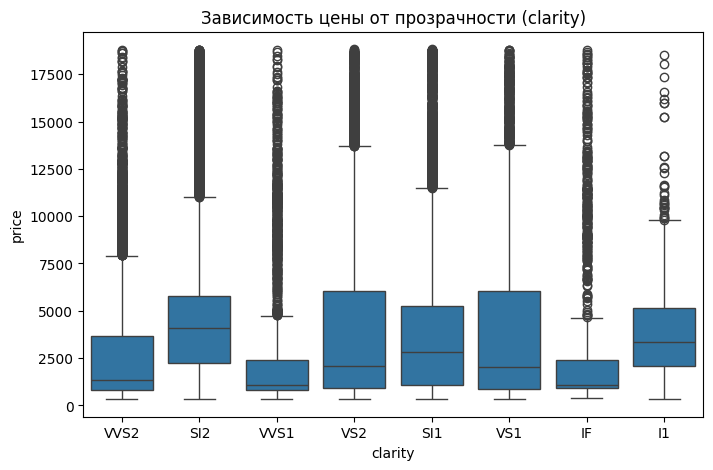

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Зависимость цены от прозрачности (clarity)')
plt.show()

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [ ]:
df.group_by(['cut', 'clarity']).agg([pl.col('price').mean().alias('price_mean'), pl.col('price').median().alias('price_median')]).sort('price_mean', descending=True)

cut,clarity,price_mean,price_median
str,str,f64,f64
"""Premium""","""SI2""",5556.262491,4292.5
"""Fair""","""SI2""",5145.740175,3681.0
"""Very Good""","""SI2""",4988.709447,4042.0
"""Ideal""","""SI2""",4761.711917,4068.0
"""Good""","""SI2""",4544.119816,3763.0
…,…,…,…
"""Ideal""","""VVS1""",2474.09024,1114.0
"""Very Good""","""VVS1""",2451.883249,941.0
"""Ideal""","""IF""",2279.618257,1020.0


## Pandas profiling

In [94]:
# !pip install ydata_profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
from ydata_profiling import ProfileReport

c:\Users\muras\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df_copy = pl.read_csv(DIAMONDS_DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [ ]:
profile_report

In [ ]:
profile_report.to_file('Diamonds_report.html')

# Домашнее задание

## 1) x, y, z

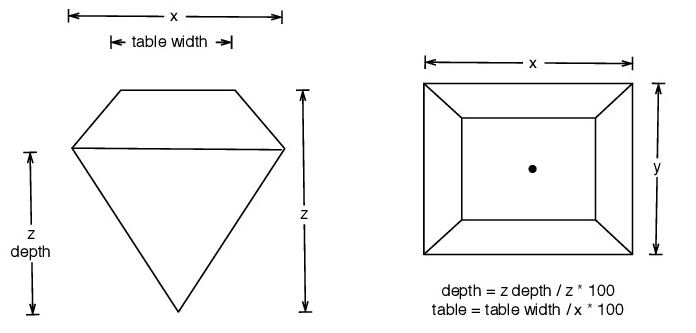

In [ ]:
df.columns

Переименуем колонки

In [ ]:
df = df.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})
df.columns

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [100]:
x_median = df['x'].median()
y_median = df['y'].median()
z_median = df['z'].median()
max(x_median, y_median, z_median)

5.71

Для каждого из этих столбцов вычислите минимальное значение.

In [101]:
df.filter(pl.col('x') > 0)['x'].min(), df.filter(pl.col('y') > 0)['y'].min(), df.filter(pl.col('z') > 0)['z'].min()

(3.73, 3.68, 1.07)

Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [103]:
zero_coords = df.filter(
    (pl.col('x') == 0) | (pl.col('y') == 0) | (pl.col('z') == 0)
).select(['x', 'y', 'z'])
print(zero_coords)
zero_coords_count = zero_coords.height
zero_coords_count


shape: (19, 3)
┌──────┬──────┬─────┐
│ x    ┆ y    ┆ z   │
│ ---  ┆ ---  ┆ --- │
│ f64  ┆ f64  ┆ f64 │
╞══════╪══════╪═════╡
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ 8.42 ┆ 8.37 ┆ 0.0 │
│ 6.5  ┆ 6.47 ┆ 0.0 │
│ 6.71 ┆ 6.67 ┆ 0.0 │
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ …    ┆ …    ┆ …   │
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ 7.15 ┆ 7.04 ┆ 0.0 │
│ 0.0  ┆ 6.62 ┆ 0.0 │
│ 8.9  ┆ 8.85 ┆ 0.0 │
│ 0.0  ┆ 0.0  ┆ 0.0 │
└──────┴──────┴─────┘


19

### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [104]:
df = df.filter(
    (pl.col('x') > 0) & (pl.col('y') > 0) & (pl.col('z') > 0)
)
df.height

53786

### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [107]:
print('x:', np.corrcoef(df['x'], df['price'])[0][1])
print('y:', np.corrcoef(df['y'], df['price'])[0][1])
print('z:', np.corrcoef(df['z'], df['price'])[0][1])

# Наибольшая корреляция от x

x: 0.8871831258995105
y: 0.8676646720310983
z: 0.8680889917330576


### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

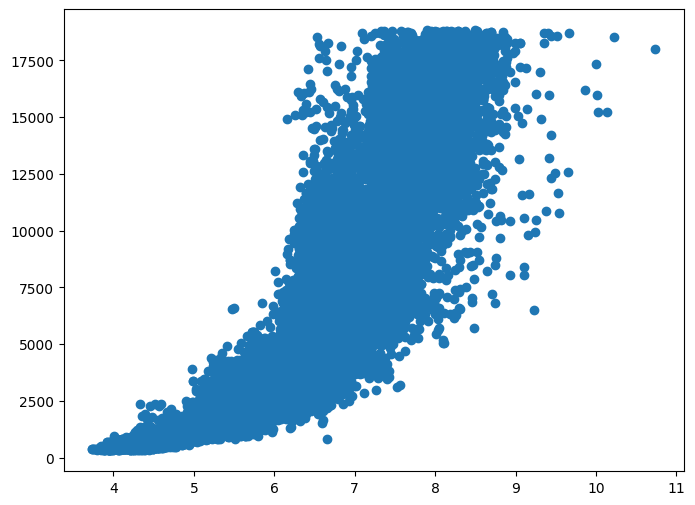

In [108]:
plt.figure(figsize=(8,6))

plt.scatter(df['x'], df['price']);

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [109]:
mean_x = df['x'].mean()
mean_y = df['y'].mean()
count_above_mean = df.filter(
    (pl.col('x') > mean_x) & (pl.col('y') > mean_y)
).height
percentage = round(count_above_mean / df.height * 100)
percentage

47

### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [110]:
median_z = df['z'].median()
large_diamonds = df.filter(pl.col('carat') >= 1)
count_below_median = large_diamonds.filter(pl.col('z') < median_z).height
share = count_below_median / large_diamonds.height
round(share, 4)

0.0002

## 2) Color

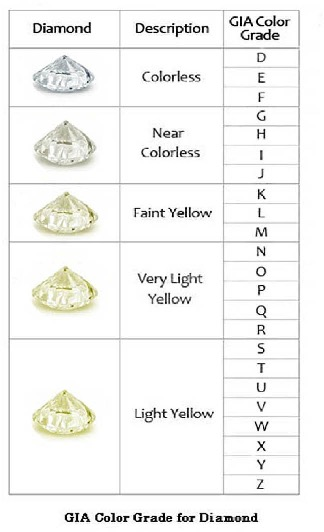

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [115]:
df['color'].unique()

color
str
"""I"""
"""H"""
"""E"""
"""J"""
"""D"""
"""F"""
"""G"""


### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

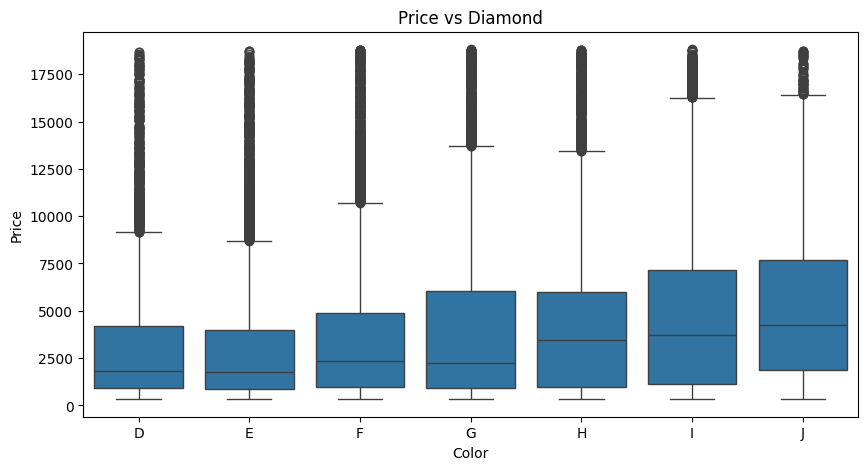

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='color', y='price', data=df,
            order=sorted(df['color'].unique()))
plt.title('Price vs Diamond')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show() # J дороже всех

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [121]:
df.group_by('color').agg([pl.col('price').median().alias('PriceMedian'), pl.col('carat').median().alias('CaratMedian')]).sort('PriceMedian', descending=True)

color,PriceMedian,CaratMedian
str,f64,f64
"""J""",4234.5,1.11
"""I""",3721.5,1.0
"""H""",3449.5,0.9
"""F""",2345.0,0.7
"""G""",2242.0,0.7
"""D""",1842.0,0.54
"""E""",1741.0,0.54


### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [126]:
df_group = df.group_by(['cut', 'color', 'clarity']).agg([pl.col('price').mean().alias('PriceMean')]).sort('PriceMean', descending=True)
row = df_group.row(0)[:3]
print(f"({','.join(str(x) for x in row)})")

(Very Good,D,IF)
